In [1]:
import mne
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import sympy as sym

In [2]:
fname = 'Data/Part1_IAPS_SES1_EEG_fNIRS_03082006.bdf'
raw = mne.io.read_raw_bdf(fname, preload=True)
n_fil = raw.copy().notch_filter(50).filter(1 ,50)


Extracting EDF parameters from e:\QUY\Research\EEG\Data\Part1_IAPS_SES1_EEG_fNIRS_03082006.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 339199  =      0.000 ...  1324.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1691 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 845 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.6s


Effective window size : 8.000 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


C:\Users\admin\AppData\Local\Temp\ipykernel_17456\1827454481.py:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  psd.plot(picks = [7])
d:\admin\anaconda3\envs\mne\Lib\site-packages\mne\viz\utils.py:161: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


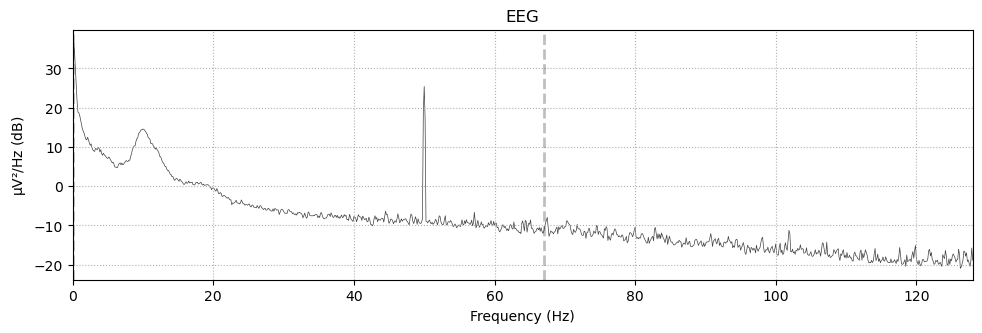

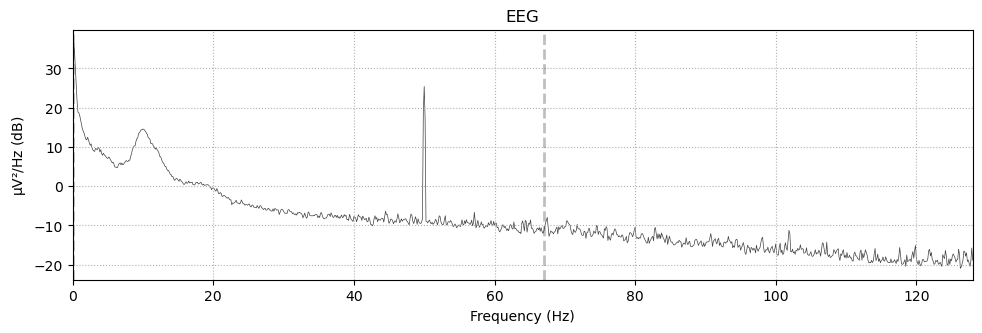

In [3]:
psd = raw.compute_psd()
psd.plot(picks = [7])


In [4]:
# raw.plot()
n_fil.plot()

Using qt as 2D backend.


In [5]:
fc2 = n_fil.get_data(picks = ['P7'], tmin=25, tmax=30)
stft = mne.time_frequency.stft(fc2, 128, 64)
freq = mne.time_frequency.stftfreq(128, 256)
time = np.linspace(25, 30, stft.shape[2], endpoint=False)
sptg = np.absolute(stft).squeeze()

Number of frequencies: 65
Number of time steps: 20


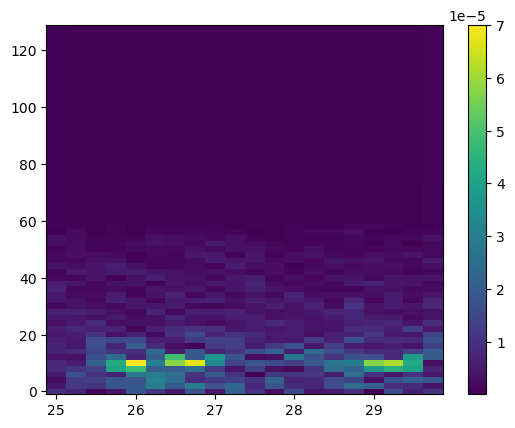

In [6]:
X, Y = np.meshgrid(time, freq)
plt.pcolormesh(X, Y, sptg)
plt.colorbar()
plt.show()

In [7]:
epoch = np.expand_dims(fc2, 1)
# freqs = np.logspace(*np.log10([6, 35]), num=8)

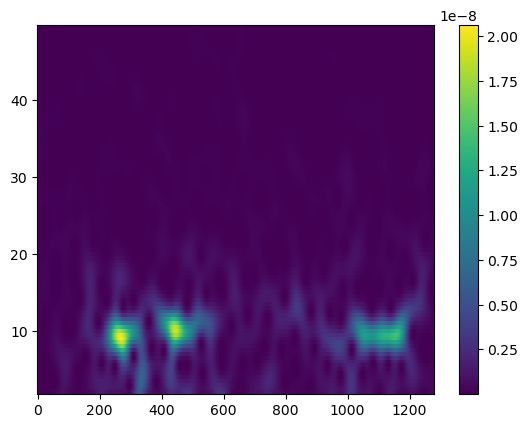

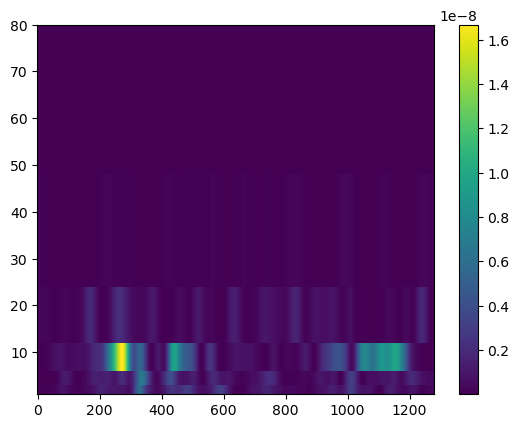

In [8]:
freqs = np.arange(2.0, 50.0, 0.5)
test_morlet = mne.time_frequency.tfr_array_morlet(epoch, 256, freqs, freqs/2, output = 'power')
X, Y = np.meshgrid(np.arange(0, 1280, 1), freqs)
# plt.subplot(2,1,1)
plt.pcolormesh(X, Y, test_morlet[0, 0])
plt.colorbar()
plt.show()

freqs = np.array([2, 4, 8, 16, 32, 64])
test_morlet = mne.time_frequency.tfr_array_morlet(epoch, 256, freqs, freqs/2, output = 'power')
X, Y = np.meshgrid(np.arange(0, 1280, 1), freqs)
# plt.subplot(2,1,2)
plt.pcolormesh(X, Y, test_morlet[0, 0])
plt.colorbar()
plt.show()


